#Problem 1
Idea: break the sequence  x1,x2,x3,...,x2n  into consecutive series of length  2 :  (x1,x2),(x3,x4),...,(x2n−1,x2n)  and look at each element as a random and independent point in  2D  space. Next, apply chi-square. Similarly, one can construct series of length  3,4 , etc.


Implement serial test and apply to a samples

In [1]:
import numpy as np
from scipy import stats

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1
samples = np.array([rng() for _ in range(1000)])


def serial_test(samples, series_length, k):
    series = np.array([samples[i:i + series_length] for i in range(0, len(samples), series_length)])
    bins = [np.linspace(0, 1, k + 1) for _ in range(series_length)]

    f_obs =  np.histogramdd(series, bins)[0] #наблюдаемые
    f_exp = np.full_like(f_obs,  len(series) / k**series_length, dtype=float) #ожидаемые

    p_value = stats.chisquare(f_obs.ravel(), f_exp.ravel())
    return p_value


res = serial_test(samples, series_length=2, k=20)
print(res)

Power_divergenceResult(statistic=391.2, pvalue=0.6003664860752091)


##Problem 3
Provide a statistical test to show that rng_bad has problems but rng_good does not.

In [3]:
import numpy as np
from scipy import stats

def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1
samples_bad = [rng_bad() for _ in range(1000)]

def rng_good(m=2**32, a=1103515245, c=12345):
    rng_good.current = (a * rng_good.current + c) % m
    return rng_good.current / m
rng_good.current = 1
samples_good = [rng_good() for _ in range(1000)]

k_bad = 20
f_obs_bad = np.histogram(samples_bad, np.linspace(0, 1, k_bad + 1))[0]
f_exp_bad = np.full(k_bad, len(samples_bad) // k_bad)
k_good = 20
f_obs_good = np.histogram(samples_good, np.linspace(0, 1, k_good + 1))[0]
f_exp_good = np.full(k_bad, len(samples_good) // k_good)

print('for rng_bad ', stats.chisquare(f_obs_bad, f_exp_bad))
print('for rng_good ', stats.chisquare(f_obs_good, f_exp_good))


for rng_bad  Power_divergenceResult(statistic=32.44, pvalue=0.027867772740595254)
for rng_good  Power_divergenceResult(statistic=19.279999999999998, pvalue=0.4390107032251506)


Действительно, значение pvalue слишком маленькое в случае rng_bad

##Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits  0,1,2,…,9  with weights  0.12,0.3,0.167,0.24,0.31,0.54,0.111,0.02,0.001,0.2 . Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

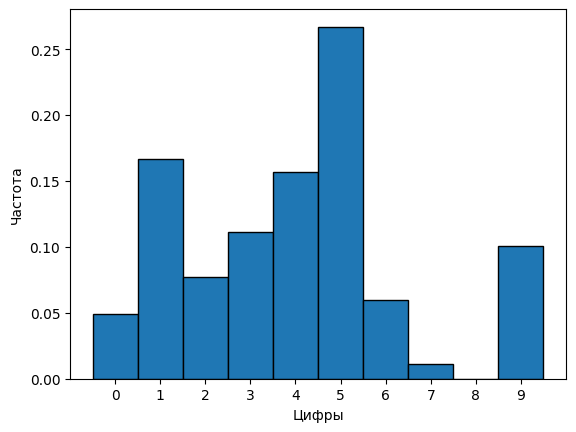

In [4]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
digits = np.arange(10)

sorted_index = np.argsort(weights)
sorted_weights = weights[sorted_index]
sorted_digits = digits[sorted_index]

sample = np.random.choice(sorted_digits, size=1000, p=sorted_weights / sorted_weights.sum())

plt.hist(sample, bins=np.arange(-0.5, 10.5, 1), density=True, edgecolor='black')
plt.xticks(digits)
plt.ylabel("Частота")
plt.xlabel("Цифры")
plt.show()


## Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

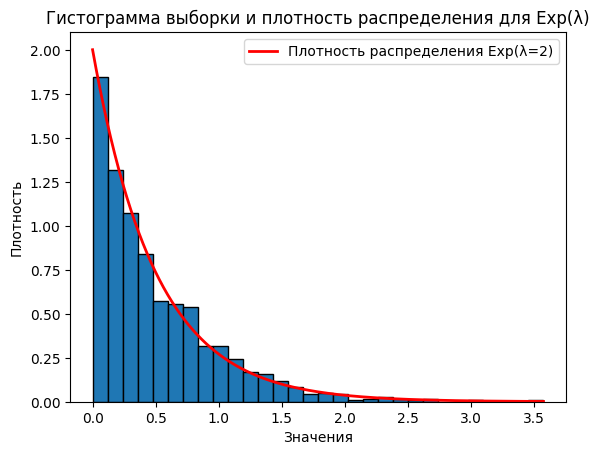

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1
sample_0 = np.array([rng() for _ in range(1000)])

lambda_param = 2

sample = -np.log(1 - sample_0) / lambda_param # F^-1

plt.hist(sample, bins=30, density=True, edgecolor='black')

x_values = np.linspace(0, np.max(sample), 1000)
plt.plot(x_values, lambda_param * np.exp(-lambda_param * x_values), 'r',
         label=f'Плотность распределения Exp(λ={lambda_param})', linewidth=2)

plt.title('Гистограмма выборки и плотность распределения для Exp(λ)')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.legend()

plt.show()

## Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

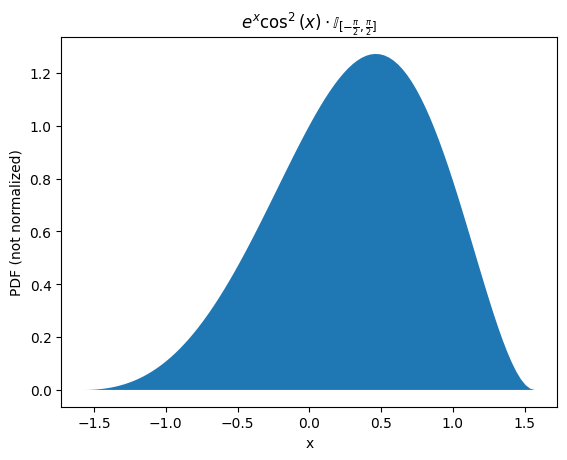

In [3]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

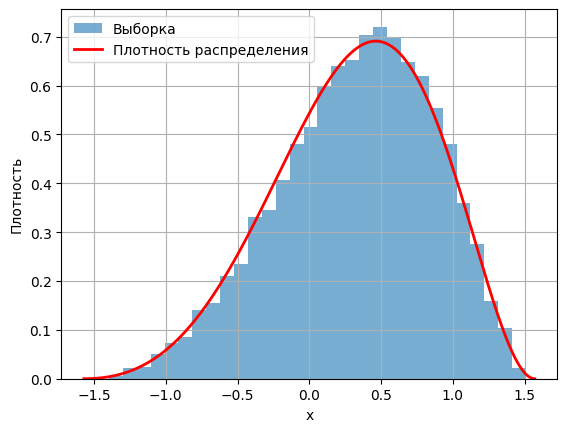

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def density(x):
    return np.exp(x) * (np.cos(x) ** 2)

I = quad(density, -np.pi/2, np.pi/2)[0]   # интеграл плотности

def norm_density(x):
    return density(x) / I  #нормированная плотность

samples = []

while len(samples) < 10000:
    x = np.random.uniform(-np.pi/2, np.pi/2)
    u = np.random.uniform(0, 1)

    if u <= norm_density(x):
        samples.append(x)

plt.hist(samples, bins=30, density=True, alpha=0.6, label='Выборка')

x_values = np.linspace(-np.pi/2, np.pi/2, 1000)
plt.plot(x_values, norm_density(x_values), 'r', label=f'Плотность распределения', linewidth=2)

plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()


## Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

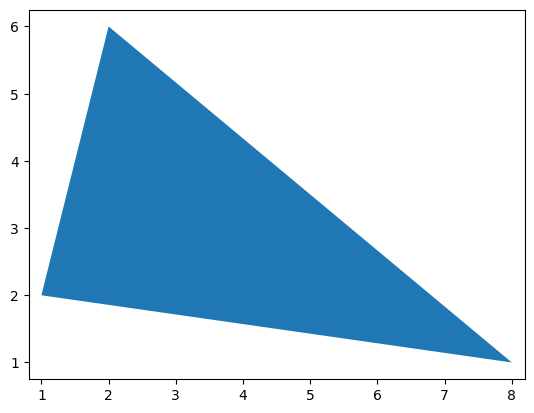

In [7]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

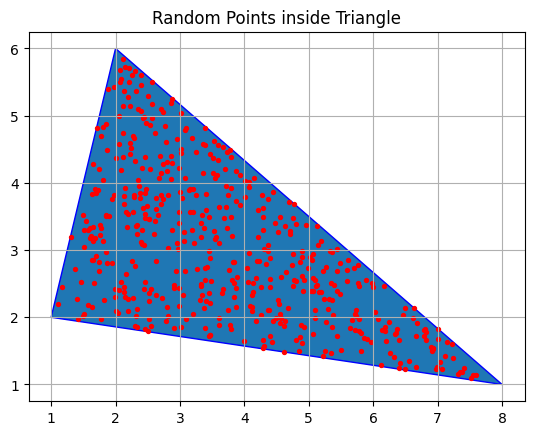

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

vertices = np.array([[1, 2], [2, 6], [8, 1]])

def triangle_area(vertices):
    return 0.5 * np.abs(vertices[0][0] * (vertices[1][1] - vertices[2][1]) +
                        vertices[1][0] * (vertices[2][1] - vertices[0][1]) +
                        vertices[2][0] * (vertices[0][1] - vertices[1][1]))

area = triangle_area(vertices)

num_points = 500
points = []

# Определяем, находится ли точка внутри треугольника
while len(points) < num_points:
    # Cлучайные координаты в прямоугольнике, который охватывает треугольник
    x_random = np.random.uniform(1, 8)
    y_random = np.random.uniform(1, 6)

    triangle1 = np.array([vertices[0], vertices[1], [x_random, y_random]])
    triangle2 = np.array([vertices[1], vertices[2], [x_random, y_random]])
    triangle3 = np.array([vertices[2], vertices[0], [x_random, y_random]])

    area1 = triangle_area(triangle1)
    area2 = triangle_area(triangle2)
    area3 = triangle_area(triangle3)

    if np.isclose(area, area1 + area2 + area3):
        points.append([x_random, y_random])

points = np.array(points)

fig, ax = plt.subplots()

polygon = Polygon(vertices, closed=True, edgecolor='blue')
ax.add_patch(polygon)

plt.scatter(points[:, 0], points[:, 1], color='red', s=8)

plt.title('Random Points inside Triangle')
plt.grid()
plt.show()


## Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

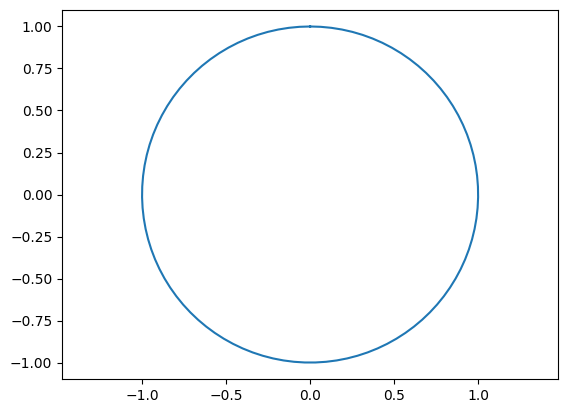

In [9]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

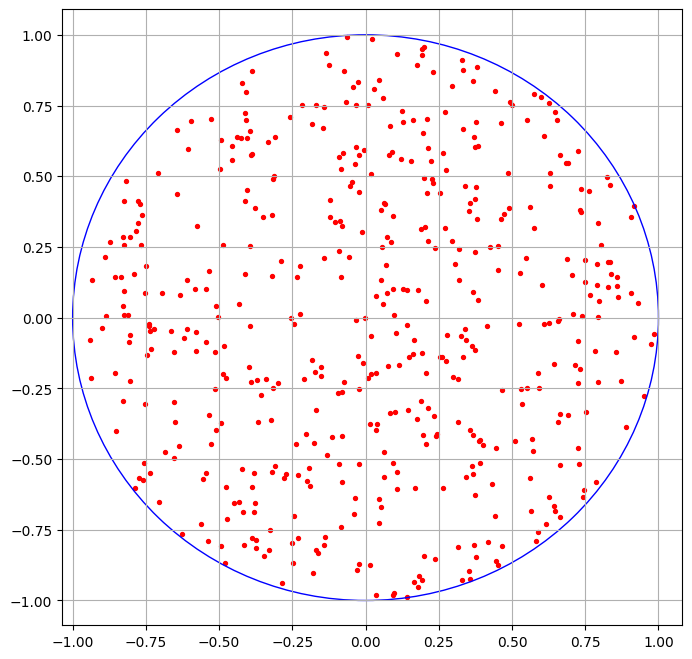

In [10]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 500

rad = np.sqrt(np.random.uniform(0, 1, num_points))
angles = np.random.uniform(0, 2 * np.pi, num_points)
#равномерно выбрали углы и радиусы

x = rad * np.cos(angles)
y = rad * np.sin(angles)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, color='red', s=8)

circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)

ax.grid()
plt.show()

## Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

Text(0.5, 1.02, '2D Gaussian Distribution')

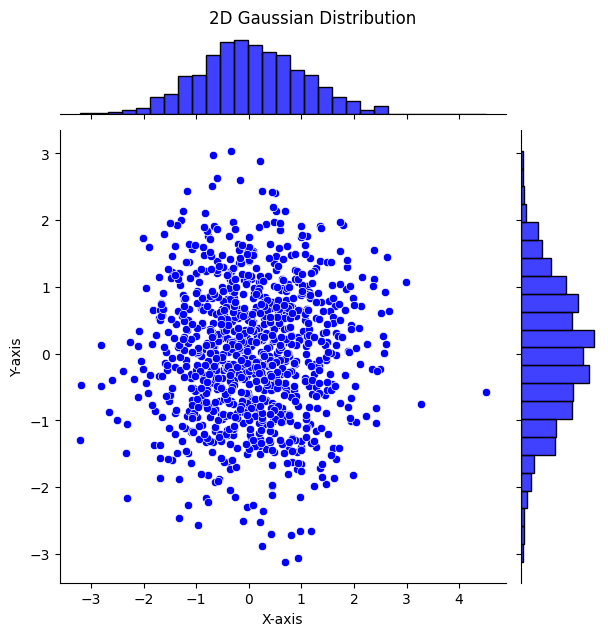

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)

joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
joint_plot.fig.suptitle('2D Gaussian Distribution', y=1.02)

 Базовая форма  берет две выборки из равномерного распределения на интервале (0,1) и сопоставляет их с двумя стандартными нормально распределенными выборками. Полярная форма берет две выборки из [−1,+1], и отображает их на две нормально распределенные выборки без использования тригонометрических функций

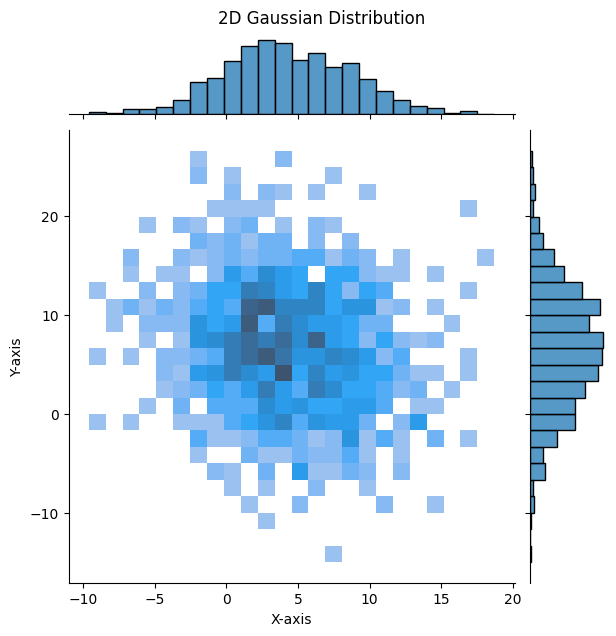

Точное значение выборочного среднего [4 7]
Выборочное среднее:
 [4.24669175 6.57653788]
Точная ковариационная матрица :
 [[20 -4]
 [-4 40]]
Выборочная ковариационная матрица:
 [[20.17136861 -5.27357849]
 [-5.27357849 39.22362352]]


In [6]:
# полярная форма метода
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n = 1000
nu = np.array([4, 7])
sigma = np.array([[20, -4], [-4, 40]])

# генерации n пар N(0,1)
def generate_standard_normals(n):
    samples = []
    while len(samples) < n:
        u, v = np.random.uniform(-1, 1, 2)
        s = u**2 + v**2
        if s == 0 or s >= 1:
            continue
        x = u * np.sqrt(-2 * np.log(s) / s)
        y = v * np.sqrt(-2 * np.log(s) / s)
        samples.append([x, y])
    return np.array(samples)

Z = generate_standard_normals(n)

# методом Холецого раскладываем ковариационную матрицу
A = np.linalg.cholesky(sigma)

X = np.matmul(Z, A) + nu  # наблюдения нужного распределения

joint_plot = sns.jointplot(x=X[:,0], y=X[:,1], kind="hist")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
joint_plot.fig.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

sample_mean = np.mean(X, axis=0)
sample_cov = np.cov(X, rowvar=False)

print("Точное значение выборочного среднего", nu)
print("Выборочное среднее:\n", sample_mean)
print("Точная ковариационная матрица :\n", sigma)
print("Выборочная ковариационная матрица:\n", sample_cov)

 -значения близки